# Time Series Homework

In [10]:
! pip install pmdarima

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import output_notebook, show, export_png
# from bokeh.io import output_file
from bokeh.plotting import figure
from itertools import chain 
from sklearn.metrics import mean_squared_error
import datetime as dt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.ar_model import AutoReg
import pmdarima as pm

import math
import pmdarima as pm
import statsmodels.api as sm
def mean_absolute_percentage_error(y_true, y_pred): 
     return np.mean(np.abs((y_true - y_pred) / y_true)) *100
output_notebook()

Loading BokehJS ...

## Problem 3

We will first read the two files given to us into dataframes that we can work with

In [131]:
ps_cpi = pd.read_csv("C:/Users/user/Desktop/Statistics/hw4/release_time_series_report_data_nops/CPI.csv")
ps_cpi['date'] =pd.to_datetime(ps_cpi['date'])
ps_cpi.head(10)

,date,CPI
0,2008-07-24,100.0000
1,2008-07-25,100.0000
2,2008-07-26,100.0000
3,2008-07-27,100.0000
4,2008-07-28,100.0000
5,2008-07-29,100.0000
6,2008-07-30,100.0000
7,2008-07-31,100.0000
8,2008-08-01,100.5251
9,2008-08-02,100.5251


Notice that while data in the file on a daily basis, CPI only changes on a monthly basis. Hence, the monthly CPI can be obtained by taking the CPI of any day during a month. Additionally, we split the data into training and testing data sets as outlined in the problem statement

In [133]:
file_path="C:/Users/user/Desktop/Statistics/hw4/release_time_series_report_data_nops/CPI.csv"

In [135]:
# cpi_monthly = pd.DataFrame(columns =['Month','CPI'])
ps_cpi['YearMonth'] = ps_cpi['date'].dt.strftime('%Y-%m')
cpi =ps_cpi.drop_duplicates('YearMonth', keep='last').copy().reset_index().drop(['index'],axis=1)
cpi_train = (cpi[cpi.YearMonth<'2013-09'].copy())
cpi_test = (cpi[cpi.YearMonth >='2013-09'].copy())
# cpi_train.CPI = np.log(cpi_train.CPI)
# cpi_test.CPI = np.log(cpi_test.CPI)
cpi.head(10)


,date,CPI,YearMonth
0,2008-07-31,100.00000,2008-07
1,2008-08-31,100.52510,2008-08
2,2008-09-30,100.12380,2008-09
3,2008-10-31,99.98538,2008-10
4,2008-11-30,98.97539,2008-11
5,2008-12-31,97.07973,2008-12
6,2009-01-31,96.07569,2009-01
7,2009-02-28,96.49385,2009-02
8,2009-03-31,96.97369,2009-03
9,2009-04-30,97.20951,2009-04


C:\Users\user\AppData\Local\Temp\ipykernel_14308\156901880.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cpi_monthly = cpi_data.resample('M', on='date').mean()


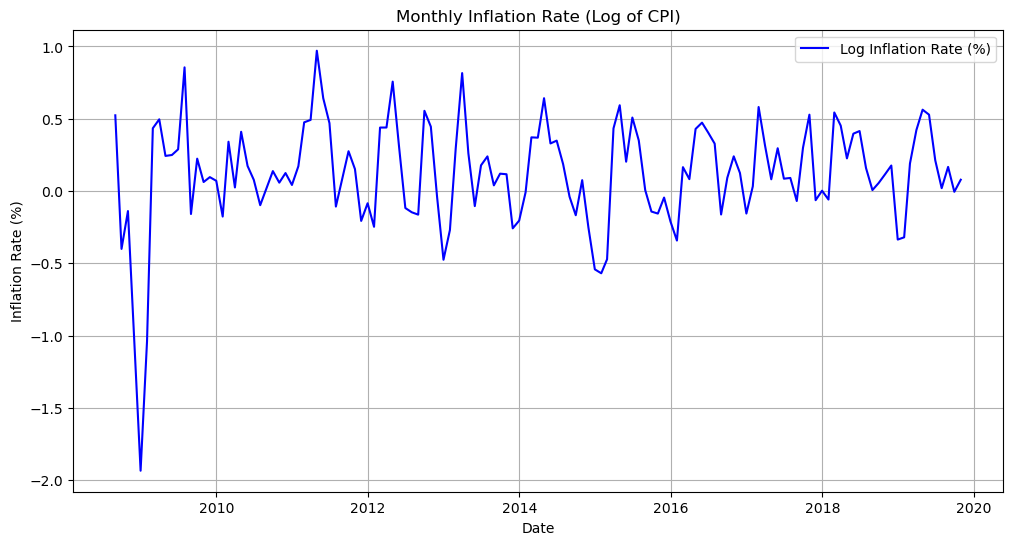

                  CPI  Log Inflation Rate (%)
date                                         
2008-07-31  100.00000                     NaN
2008-08-31  100.52510                0.523726
2008-09-30  100.12380               -0.400003
2008-10-31   99.98538               -0.138344
2008-11-30   98.97539               -1.015274
2008-12-31   97.07973               -1.933863
2009-01-31   96.07569               -1.039628
2009-02-28   96.49385                0.434296
2009-03-31   96.97369                0.496043
2009-04-30   97.20951                0.242884
2009-05-31   97.45218                0.249325
2009-06-30   97.73370                0.288464
2009-07-31   98.57322                0.855319
2009-08-31   98.41692               -0.158688
2009-09-30   98.63766                0.224040


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


cpi_data = pd.read_csv(file_path)

# Convert the date column to datetime format
cpi_data['date'] = pd.to_datetime(cpi_data['date'], format='%m/%d/%Y')

# Aggregate the data to get the average CPI for each month
cpi_monthly = cpi_data.resample('M', on='date').mean()

# Calculate the monthly inflation rate using the logarithmic formula
cpi_monthly['Log Inflation Rate (%)'] = (np.log(cpi_monthly['CPI']) - np.log(cpi_monthly['CPI'].shift(1))) * 100

# Plot the monthly inflation rate
plt.figure(figsize=(12, 6))
plt.plot(cpi_monthly.index, cpi_monthly['Log Inflation Rate (%)'], label='Log Inflation Rate (%)', color='blue')
plt.title('Monthly Inflation Rate (Log of CPI)')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

# Display the first few rows of the result
print(cpi_monthly.head(15))


C:\Users\user\AppData\Local\Temp\ipykernel_14308\4110522907.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Inflation Rate'] = df['CPI'].pct_change() * 100


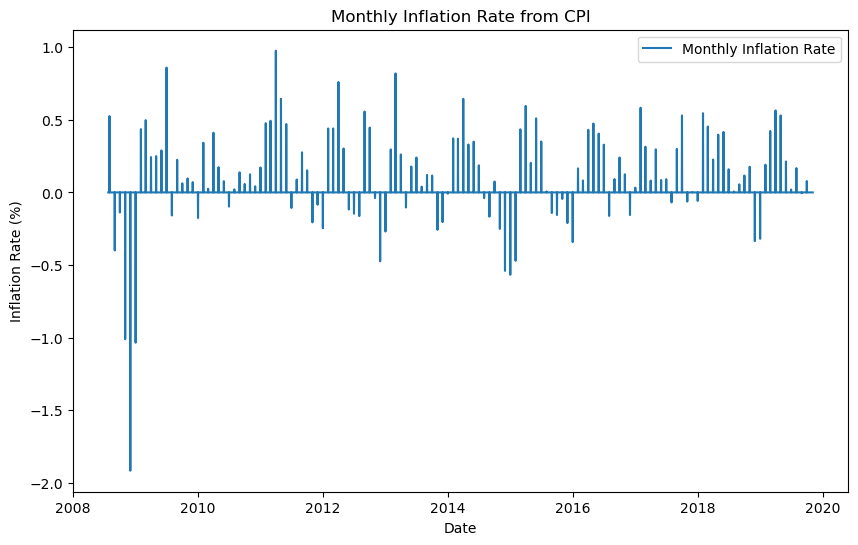

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming CPI data is loaded into a DataFrame 'df' with a column 'CPI'
df['Inflation Rate'] = df['CPI'].pct_change() * 100

# Alternatively, using log difference
df['Log CPI'] = np.log(df['CPI'])
df['Log Inflation Rate'] = df['Log CPI'].diff()

# Plotting the monthly inflation rate
plt.figure(figsize=(10, 6))
plt.plot(df['Inflation Rate'], label='Monthly Inflation Rate')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.title('Monthly Inflation Rate from CPI')
plt.legend()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_14308\3885164847.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Inflation Rate'] = df['CPI'].pct_change() * 100


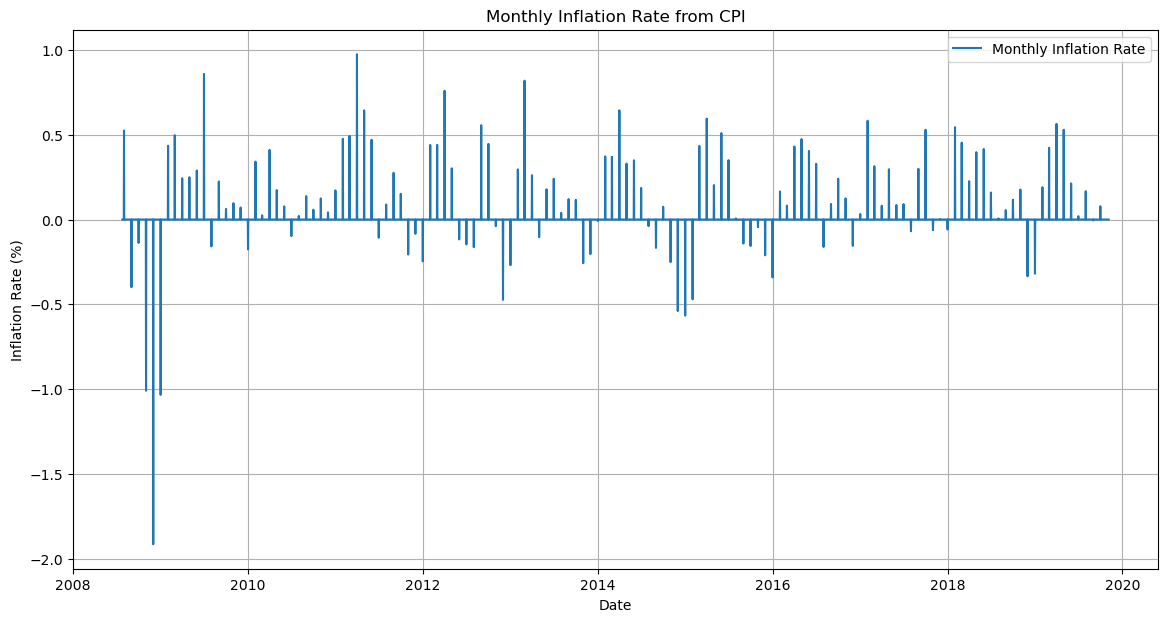

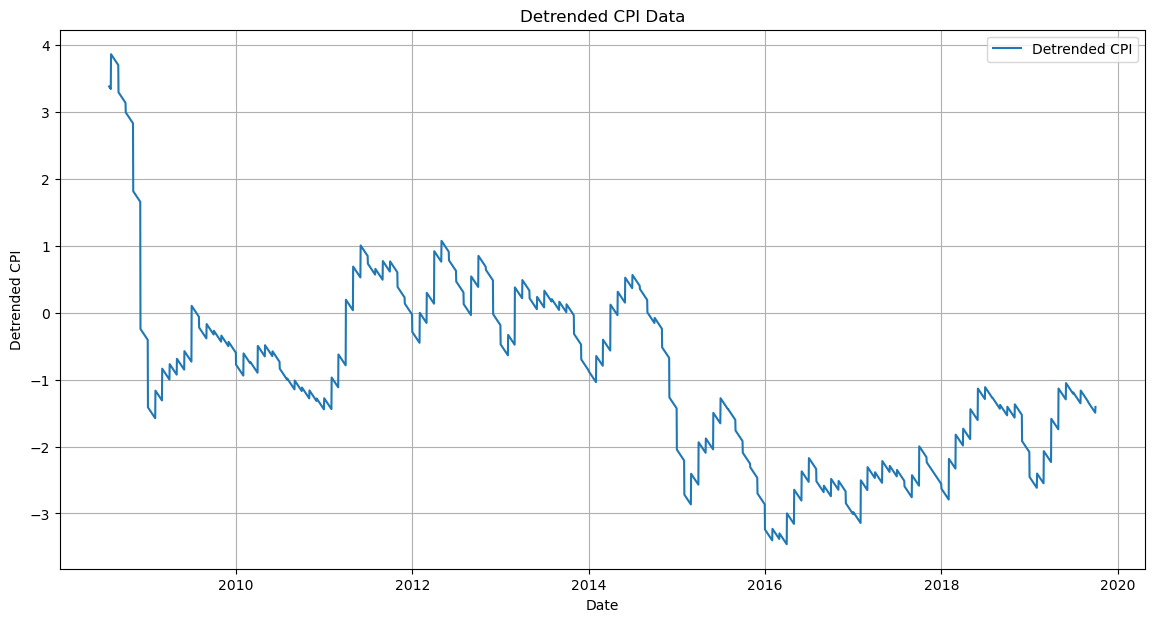

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your data
# Assuming your CSV file has a 'Date' column and a 'CPI' column
df = pd.read_csv("C:/Users/user/Desktop/Statistics/hw4/release_time_series_report_data_nops/CPI.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Compute the monthly inflation rate
df['Inflation Rate'] = df['CPI'].pct_change() * 100

# Optionally, use log differences
df['Log CPI'] = np.log(df['CPI'])
df['Log Inflation Rate'] = df['Log CPI'].diff() * 100

# Plot the monthly inflation rate
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Inflation Rate'], label='Monthly Inflation Rate')
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.title('Monthly Inflation Rate from CPI')
plt.legend()
plt.grid(True)
plt.show()

# Prepare the data for linear regression
df['Time'] = np.arange(len(df))
train_df = df[df.index < '2013-09-01']

# Fit linear regression on the training data
X_train = train_df[['Time']]
y_train = train_df['CPI']

model = LinearRegression()
model.fit(X_train, y_train)

# Extract the coefficients
alpha_0 = model.intercept_
alpha_1 = model.coef_[0]

# Compute the trend and detrended CPI
df['Trend'] = model.predict(df[['Time']])
df['Detrended CPI'] = df['CPI'] - df['Trend']

# Plot the detrended CPI
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Detrended CPI'], label='Detrended CPI')
plt.xlabel('Date')
plt.ylabel('Detrended CPI')
plt.title('Detrended CPI Data')
plt.legend()
plt.grid(True)
plt.show()


In [111]:
alpha_0 


96.61790000225855

In [113]:
alpha_1 

0.005416044918125731

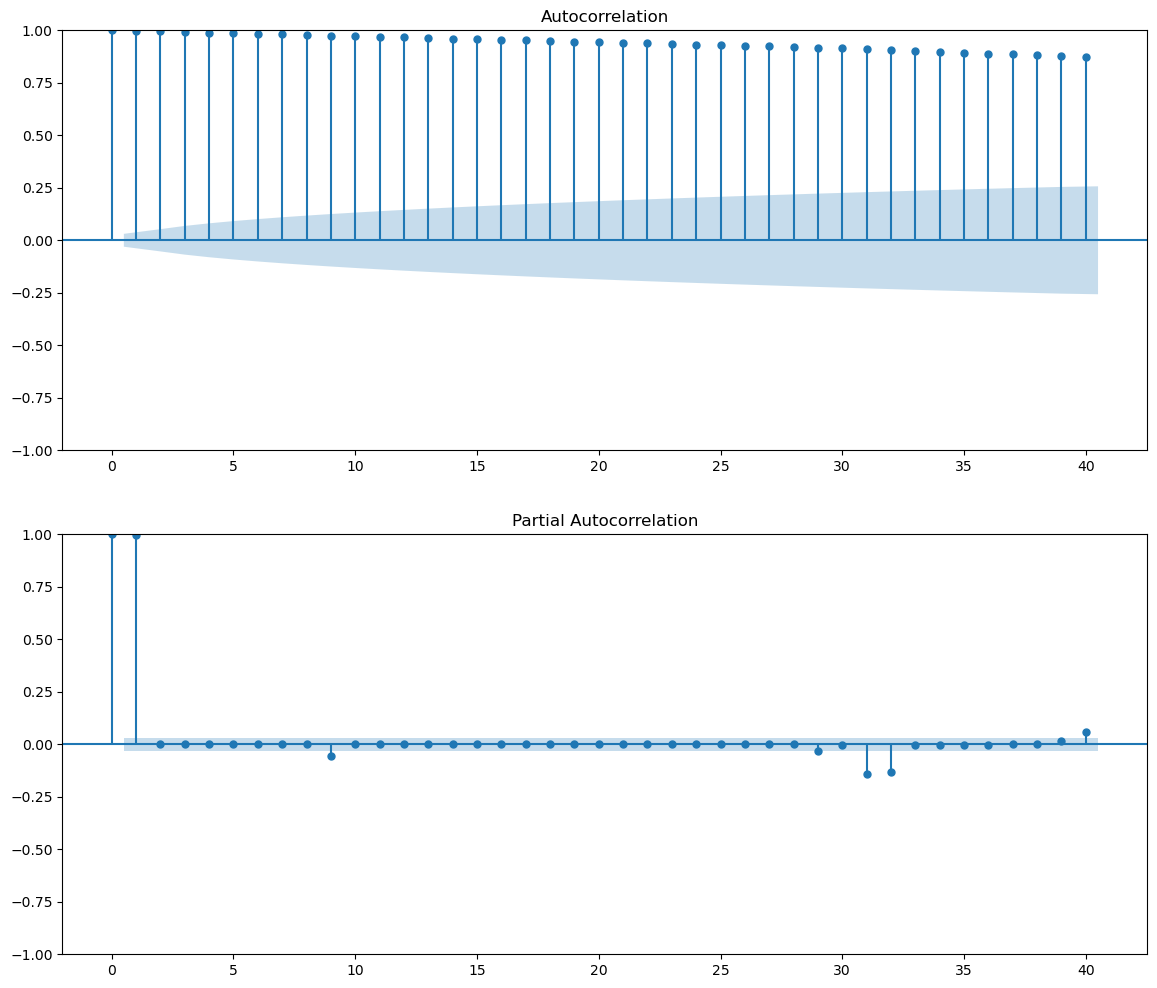

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Detrended CPI   No. Observations:                 4087
Model:                 ARIMA(2, 0, 0)   Log Likelihood                4878.382
Date:                Wed, 07 Aug 2024   AIC                          -9748.764
Time:                        19:27:52   BIC                          -9723.502
Sample:                    07-24-2008   HQIC                         -9739.819
                         - 10-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9510      0.429     -2.219      0.027      -1.791      -0.111
ar.L1          0.9944      0.126      7.902      0.000       0.748       1.241
ar.L2          0.0029      0.126      0.023      0.9

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load your data
df = pd.read_csv('C:/Users/user/Desktop/Statistics/hw4/release_time_series_report_data_nops/CPI.csv')
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Fit linear trend and compute residuals
df['Time'] = np.arange(len(df))
train_df = df[df.index < '2013-09-01']

# Fit linear regression on the training data
X_train = train_df[['Time']]
y_train = train_df['CPI']

model = LinearRegression()
model.fit(X_train, y_train)

# Compute the trend and residuals
df['Trend'] = model.predict(df[['Time']])
df['Detrended CPI'] = df['CPI'] - df['Trend']

# Residuals
residuals = df['Detrended CPI']

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(14, 12))
plot_acf(residuals.dropna(), lags=40, ax=ax[0])
plot_pacf(residuals.dropna(), lags=40, ax=ax[1])
plt.show()

# Fit AR model based on PACF
from statsmodels.tsa.arima.model import ARIMA

# Assuming p=2 based on PACF analysis
model = ARIMA(residuals.dropna(), order=(2, 0, 0))  # AR(2) model
model_fit = model.fit()
print(model_fit.summary())


Visualize the time series

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Load and preprocess the data
data = pd.read_csv('inflation_data.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Inflation_Rate'] = data['CPI'].pct_change() * 100

# Split the data into training and validation sets
train_data = data['Inflation_Rate'][:-12]  # Train on all but the last 12 months
validation_data = data['Inflation_Rate'][-12:]  # Validate on the last 12 months

# Fit the AR model on the training data
model = AutoReg(train_data.dropna(), lags=1)
AR_model = model.fit()

# Compute 1 month-ahead forecasts for the validation data
forecasts = AR_model.predict(start=len(train_data), end=len(train_data) + len(validation_data) - 1, dynamic=False)


In [87]:
p = figure(width=400, height=400, title = "Monthly CPI")
p.line(cpi_train.index,cpi_train.CPI,line_color="navy",line_width =2.5)
p.xaxis.axis_label ='t'
p.yaxis.axis_label ='CPI'
show(p)

From the visualization, it is clear that the timeseries has a deterministic trend. We try and fit a linear model to the data (as in the question above) and see if this is sufficient to represent the trend. We then subtract this trend from the data.


In [139]:
model = LinearRegression().fit(np.array(cpi_train.index).reshape(-1, 1),cpi_train.CPI)
coefficients = [model.coef_[0],model.intercept_]
print("The linear trend is given by F(t) = " +str(coefficients[0])+"*t + (" +str(coefficients[1])+")")
linear_cpi =model.predict(np.array(cpi_train.index).reshape(-1, 1))
p = figure(width=400, height=400, title = "CPI Time Series")
p.line(cpi_train.index,cpi_train.CPI, line_color="navy", line_width=2, legend_label ="Original Data")
p.line(cpi_train.index,linear_cpi, line_color="orange",line_width=2.5,legend_label ="Linear Trend")

p.xaxis.axis_label ='t'
p.yaxis.axis_label ='CPI'
p.legend.location='bottom_right'
show(p)

The linear trend is given by F(t) = 0.16104348366951224*t + (96.72932632872502)


We now subtract this linear trend from the data. When prompted to 'Choose Method:' in the following part, please type 'linear'

> $\textit{Note :}$ An alternative to detrending the data in this manner would be to take first difference. Economists tend to log transform the CPI data and then take the first difference in order to detrend it. While the problem set only asks for the linear trend to be removed from the data, the code below allows you to visualize what the first difference of log transform looks like as well. In order to see this, please enter "log" when asked to choose method. Please remember to run the block again with the method as linear to proceed with the next part of the PSET.

In [26]:
x = input('Choose Method:')
if x == 'linear':
    remaining = cpi_train.CPI - linear_cpi
    linear_cpi_test = model.predict(np.array(cpi_test.index).reshape(-1, 1))
    remaining_test = cpi_test.CPI - linear_cpi_test
    test = cpi_test.index
    train = cpi_train.index
else:
    cpi_diff_log = np.log(cpi.CPI).diff()
    remaining = cpi_diff_log[0:cpi_train.shape[0]]
    remaining.iloc[0] = 0    
    #.reset_index()#.drop(['index'],axis =1)
    remaining_test = cpi_diff_log[cpi_train.shape[0]:].dropna()
    remaining_test.iloc[0] = 0
    test = cpi_test.index
    train = cpi_train.index


    
p = figure(width=400, height=400, title = "CPI Time Series")
p.line(train,remaining, line_color="navy", line_width=2, legend_label ="Detrended Data")



# p.line(cpi_diff.index,cpi_diff,line_color="green",line_width =2.5)
show(p)
print("the maximum residual value is:"+str(np.max(remaining)))

Choose Method: linear


the maximum residual value is:3.634730187605456


Note that at some stage, we will be required to add back the trend to the data. The function $\texttt{rebuild_diffed()}$ below has been designed for this purpose. We will be calling this function later.

In [10]:
def rebuild_diffed(series, first_element_original,x,linear_trend):
    if x == 'linear':
        final = series + linear_trend
    else:
        cumsum = pd.Series(series).cumsum()
        final = np.exp(cumsum.fillna(0) + first_element_original)
        if first_element_original == 0:
            final = np.exp(cumsum.fillna(0))
    return final

As there seems to be no other trend present in this residual, we can take the linear trend to be sufficient and move to the next step, i.e. to deseasonalize the data. However, the above visualization seems to indicate no clear seasonality. Hence, we directly proceed to fitting an AR Model on the residual. To do so, we first plot the autocorrelation and partial autocorrelation plots.

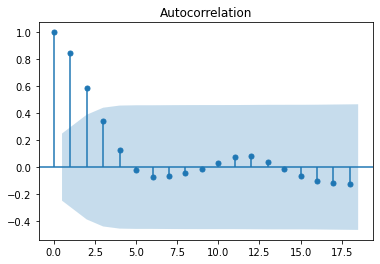

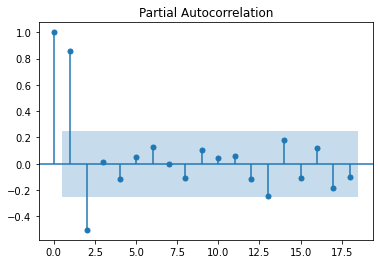

In [11]:
#linear
plot_acf(remaining)
plt.show()
plot_pacf(remaining)
plt.show()

From the above PACF plot, we can see that the highest lag at which the plot extends beyond the statistically significant boundary is at lag 2. This indicates that an AR Model of lag 2 should be sufficient to fit the data. However, we can further verify this by calculating the rmse of the fit

In [12]:
rmse_train=[]

for n in range(1,8):
    model = AutoReg(remaining, lags= n,trend='n')
    model_fit = model.fit()
    predictions=model_fit.predict()
    rmse=(mean_squared_error(remaining[n:], predictions[n:]))**0.5
    rmse_train.append(rmse)

    
    
p = figure(plot_width=400, plot_height=400, title = "RMSE of AR Models of order n")
p.scatter(np.arange(1,8),rmse_train,size = 15, marker ="square", line_color="navy",fill_color="orange", fill_alpha =0.5, legend_label ="RMSE")
p.xaxis.axis_label ='n'
p.yaxis.axis_label ='RMSE'
p.legend.location='top_right'
show(p)




C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use t

In [37]:
#plot RMSE for a range of lags p 
n = 2
rmse_ar=[]
for n in range(1,8):
    model = AutoReg(remaining, lags= n)
    model_fit = model.fit()
    coef = model_fit.params
    past = remaining[len(remaining)-n:].values
    past = [past[i] for i in range(len(past))]    
    test_predictions = list()
    for t in range(len(remaining_test.dropna())):
        length = len(past)
        lag = [past[i] for i in range(length-n,length)]
        pred = coef[0]
        for d in range(n):
            pred += coef[d+1] * lag[n-d-1]
        obs = remaining_test.values[t]
        test_predictions.append(pred)
        past.append(obs)
    rmse = (mean_squared_error(remaining_test.dropna(), test_predictions))**0.5
    rmse_ar.append(rmse)
    print('Test RMSE for AR(' + str(n) +'):' + str(rmse))

p = figure(plot_width=400, plot_height=400, title = "RMSE of AR Models of order n")
p.scatter(np.arange(1,8),rmse_ar,size = 15, marker ="square", line_color="navy",fill_color="orange", fill_alpha =0.5, legend_label ="RMSE")
p.xaxis.axis_label ='n'
p.yaxis.axis_label ='RMSE'
p.legend.location='bottom_right'
show(p)

Test RMSE for AR(1):0.3718449350821093
Test RMSE for AR(2):0.39328060138088866
Test RMSE for AR(3):0.3784955272936298
Test RMSE for AR(4):0.44251979719237056
Test RMSE for AR(5):0.43456315263365036
Test RMSE for AR(6):0.34020763928627823
Test RMSE for AR(7):0.31251327073280627


/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
 

The plot above seems to indicate the AR(1) model predictions have the least rmse. While it would have been ideal to have our previous conclusion of model order 2 validated by the RMSE, we should note this kind of discrepancy between the two diagnostic methods (rmse and PACF) can occur when working with finite data sets. In order to proceed, we choose to work with model order of 2 so we do not miss out on possible lag terms.

In [23]:
## Building AR (2) Model 
n = 2
AR2_model = AutoReg(remaining, lags= n).fit()# Here we have used the default value for the trend parameter
coef = AR2_model.params
print(coef)

# walk forward over time steps in test
past = remaining[len(remaining)-n:].values
past = [past[i] for i in range(len(past))]
test_predictions = list()
training_predictions = AR2_model.predict(start = train[0], end =train[-1])
for t in range(len(remaining_test)):
    length = len(past)
    lag = [past[i] for i in range(length-n,length)]
    pred = coef[0]
    for d in range(n):
        pred += coef[d+1] * lag[n-d-1]
    obs = remaining_test.values[t]
    test_predictions.append(pred)
    past.append(obs)
final_training = (rebuild_diffed(training_predictions,np.log(cpi_train.CPI[0]),x,linear_cpi))
final_test = (rebuild_diffed(test_predictions,np.log(cpi_train.iloc[-1].CPI),x,linear_cpi_test))



intercept   -0.043105
CPI.L1       1.323666
CPI.L2      -0.530797
dtype: float64


We now plot the final model predictions and the actual observed data together to visualize the fit.

In [24]:
p = figure(plot_width=800, plot_height=400, title = "CPI predictions")
p.line(cpi_train.index,cpi_train.CPI,line_width =2.5, line_color="black", line_dash="dashed", legend_label ="Training Data")
p.line(cpi_test.index,cpi_test.CPI,line_width =2.5, line_color="green", line_dash="dashed", legend_label ="Test Data")
p.line(cpi_train.index,final_training,line_color="red",line_width=2.5,legend_label ="Final AR(2) Model (Training Data Fit)")
p.line(cpi_test.index,final_test,line_color="orange",line_width=2.5,legend_label ="Final AR(2) Model Predictions")


p.legend.location = "bottom_right"
p.xaxis.axis_label ='t'
p.yaxis.axis_label ='CPI'

show(p)


We see that the AR(2) Model does predict pretty well and the mean squared prediction error is small. We can also reaffirm this conclusion by plotting the residuals after the AR(2) predictions are subtracted from the detrended data 

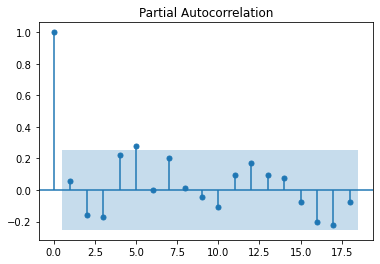

In [25]:
residuals = (remaining - training_predictions)[2:]
plot_pacf(residuals)
plt.show()

In [26]:
rmse = mean_squared_error(cpi_test.dropna().CPI,final_test[:-2])**0.5
print("The rmse of the final fit is " + str(rmse))

The rmse of the final fit is 0.39328060138088855


We see that the fit has a low rmse, considering that the order of the data is $10^2$.

**Inflation Rate**
In the next part of the question, since we will be working with external regressors that have different units(such as BER), we must first convert all the data into an equivalent form, i.e monthly inflation rates. We will first do so for CPI from which inflation rates can be simply calculated as
> $IR_t = \frac{CPI_t -CPI_{t-1}}{CPI_{t-1}}$

In [27]:
def calc_inflation_rate(data):
    ir = []
    for i in range(1,len(data)):
        ir_temp = (data[i]-data[i-1])/data[i-1] *100      
        ir.append(ir_temp)
#         print(i)
    return ir

In [28]:
#calculate monthly inflation from CPI
val = calc_inflation_rate(cpi.CPI.values)
val2=np.log(cpi.CPI).diff().values*100

cpi.loc[1:, 'IR_cpi'] = val
cpi['diff_log'] = val2

cpi_ir_train = (cpi[cpi.YearMonth<'2013-09'].copy())
cpi_ir_test = (cpi[cpi.YearMonth >='2013-09'].copy())

print("The inflation rate from CPI for the month of February in 2013 was %0.9f" % cpi[cpi.YearMonth =='2013-02']['IR_cpi'] + " %")
print("The inflation rate from CPI for the month of February in 2013 was %0.9f" % cpi[cpi.YearMonth =='2013-02']['diff_log'] + " %")


The inflation rate from CPI for the month of February in 2013 was 0.295722930 %
The inflation rate from CPI for the month of February in 2013 was 0.295286530 %


In [29]:
p = figure(plot_width=400, plot_height=400, title = "Monthly IR from CPI (in %)")
p.line(cpi_diff_log.index,cpi['diff_log'],line_color="navy",line_width =2.5)
p.line(cpi['IR_cpi'].index,cpi['IR_cpi'],line_color="orange",line_width =2.5)
# p.line(cpi_diff.index,cpi_diff,line_color="green",line_width =2.5)
p.xaxis.axis_label ='t'
p.yaxis.axis_label ='Diff Ratio CPI'
show(p)



Now we move on to converting BER to monthly inflation rates. Note that BER is reported on a daily basis. We first choose a monthly representative value by averaging the BER across all days of the month. BER is already a rate, however it is reported across a 10 year period. In order to convert this to a monthly value, we must then deannualize it using the following formula.
> $BER_t = (BER_t +1)^\frac{1}{12} -1$

In [43]:
ber = pd.read_csv('data/T10YIE.csv')
ber['DATE'] =pd.to_datetime(ber['DATE'])
ber['YearMonth'] = ber['DATE'].dt.strftime('%Y-%m')
ber = ber.drop(ber[ber.YearMonth< '2008-07'].index)
ber = ber.dropna()
#print(ber)

ber_monthly = pd.DataFrame(columns =['YearMonth','BER'])
ber_monthly['BER'] =ber.groupby('YearMonth').T10YIE.mean().values
ber_monthly['YearMonth'] = cpi.YearMonth
ber_monthly.drop([0])

#print(ber_monthly)
ber_ir_train = (ber_monthly[ber_monthly.YearMonth<'2013-09'].copy())
ber_ir_test = (ber_monthly[ber_monthly.YearMonth >='2013-09'].copy())


ber_ir_train['IR_ber'] = ((ber_ir_train.BER.values/100+1)**(1/12)-1)*100
ber_ir_test['IR_ber'] = ((ber_ir_test.BER.values/100+1)**(1/12)-1)*100
print("The inflation rate from BER for the month of February in 2013 was %0.9f" % ber_ir_train[ber_ir_train.YearMonth == '2013-02']['IR_ber'] + " %")

The inflation rate from BER for the month of February in 2013 was 0.210441852 %


C:\Users\user\AppData\Local\Temp\ipykernel_14308\2377571371.py:13: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['Inflation Rate'] = df['CPI'].pct_change() * 100
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


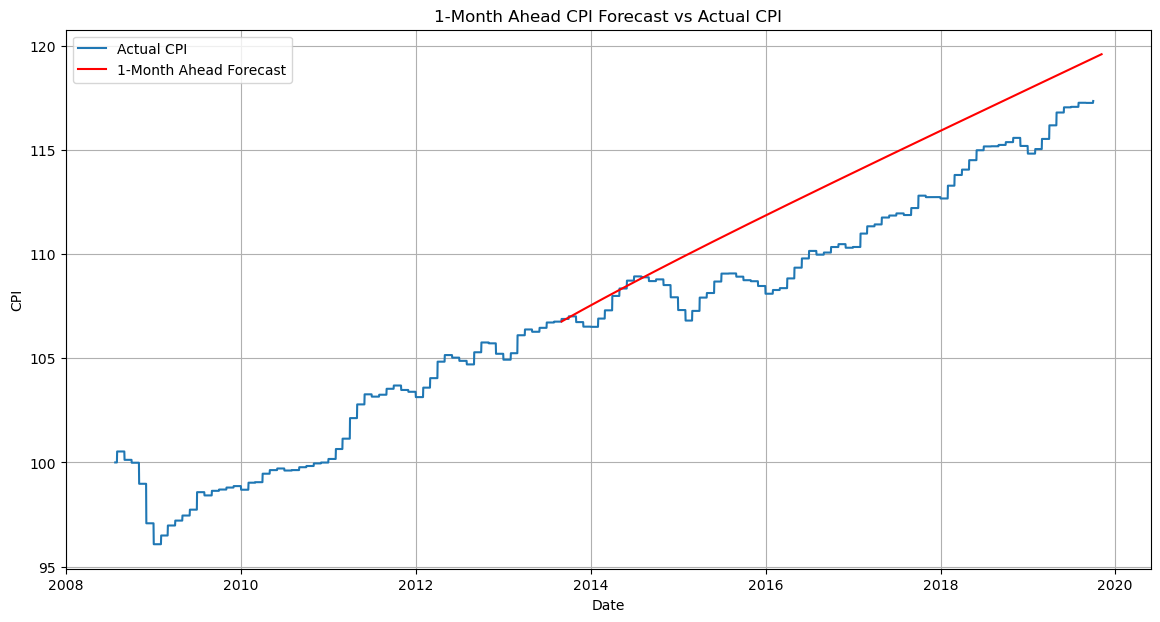

                               SARIMAX Results                                
Dep. Variable:          Detrended CPI   No. Observations:                 1865
Model:                 ARIMA(2, 0, 0)   Log Likelihood                1955.793
Date:                Wed, 07 Aug 2024   AIC                          -3903.586
Time:                        19:22:40   BIC                          -3881.462
Sample:                    07-24-2008   HQIC                         -3895.434
                         - 08-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6603      0.850      0.776      0.438      -1.007       2.327
ar.L1          0.9980      0.256      3.891      0.000       0.495       1.501
ar.L2          0.0004      0.257      0.001      0.9

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

# Load your data
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Compute the monthly inflation rate
df['Inflation Rate'] = df['CPI'].pct_change() * 100

# Prepare the data for linear regression
df['Time'] = np.arange(len(df))
train_df = df[df.index < '2013-09-01']
validation_df = df[df.index >= '2013-09-01']

# Fit linear regression on the training data
X_train = train_df[['Time']]
y_train = train_df['CPI']

model = LinearRegression()
model.fit(X_train, y_train)

# Compute the trend and residuals
df['Trend'] = model.predict(df[['Time']])
df['Detrended CPI'] = df['CPI'] - df['Trend']

# Residuals
residuals = df.loc[train_df.index, 'Detrended CPI']

# Fit AR model based on PACF
# Assuming p=2 based on PACF analysis
model_ar = ARIMA(residuals.dropna(), order=(2, 0, 0))  # AR(2) model
model_ar_fit = model_ar.fit()

# Forecast 1-month ahead
forecast_residuals = model_ar_fit.forecast(steps=len(validation_df))

# Add trend back to the forecasted residuals
forecast_cpi = forecast_residuals + df.loc[validation_df.index, 'Trend']

# Plot actual vs forecasted CPI
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['CPI'], label='Actual CPI')
plt.plot(forecast_cpi.index, forecast_cpi, label='1-Month Ahead Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('1-Month Ahead CPI Forecast vs Actual CPI')
plt.legend()
plt.grid(True)
plt.show()

# Print summary of the AR model
print(model_ar_fit.summary())


In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Load your data
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Prepare the data for linear regression
df['Time'] = np.arange(len(df))
train_df = df[df.index < '2013-09-01']

# Fit linear regression on the training data
X_train = train_df[['Time']]
y_train = train_df['CPI']

model = LinearRegression()
model.fit(X_train, y_train)

# Compute the trend and residuals
df['Trend'] = model.predict(df[['Time']])
df['Detrended CPI'] = df['CPI'] - df['Trend']

# Residuals
residuals = df.loc[train_df.index, 'Detrended CPI']

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(14, 12))
plot_acf(residuals.dropna(), lags=40, ax=ax[0])
plot_pacf(residuals.dropna(), lags=40, ax=ax[1])
plt.show()

# Fit AR model based on PACF
# Assuming p=2 based on PACF analysis
model_ar = ARIMA(residuals.dropna(), order=(2, 0, 0))  # AR(2) model
model_ar_fit = model_ar.fit()
print(model_ar_fit.summary())


ValueError: Input y contains NaN.